# INTRODUCTION

For this problem I'll build support vector machine for classification(using scikit learn and the Radial Basis Function(RBF) kernel). The training dataset contains both continuous and categorical data from the UCI Machine Learning Repository to classify whether a person wil default or not on their credit card.

SVM are one of the best ML method because they work really wellwith small datasets and they work really well even without optimization.

For this problem I'll follow the following steps:
1. Importing the data and necessary libraries.
2. Identifying and handling missing values.
3. Downsampling data.
4. Train-test split the data.
5. Building a preliminary svm.
6. Doing hyperparamter tuning to find the best optimization parameters like gamma.
7. Evaluating and interpreting the final svm.

In [29]:
import pandas as pd
df=pd.read_csv('default of credit card clients.csv',header=1)

In [30]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Data Description:

**ID** The ID number of each customer.                                                                               
**LIMIT_BAL** Credit Limit(it includes both the individual consumer credit and his/her family (supplementary)                     credit.)                                                                                               
**SEX** Gender((1 = male; 2 = female)                                                                               
**EDUCATION** (1 = graduate school; 2 = university; 3 = high school; 4 = others).                                   
**Marital status** (1 = married; 2 = single; 3 = others).                                                          
**Age** in year.                                                                                                     
**PAY_X** History of past payment(When the last 6 bills were payed)
         -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay           for eight months; 9 = payment delay for nine months and above.                                             
**BILL_AMTX** What the last 6 bills were.                                                                           
**PAY_AMTX** How much the last payments were.                                                                       
**default payment next month** Whether a defaulter or not(1=yes, 0=no)                                               

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.decomposition import PCA

In [34]:
df.rename({'default payment next month':'DEFAULTER'},axis='columns',inplace=True)

In [35]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [36]:
df.drop('ID',axis=1,inplace=True)

In [37]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [38]:
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [39]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [40]:
df['SEX'].unique()

array([2, 1])

In [41]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [42]:
df['AGE'].max()

79

In [43]:
df['AGE'].min()

21

In [44]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

# MISSING OR INVALID VALUES

**Identifying:**
There are no null values in the dataset. That's a relief, but if we analyse closely we find that in the EDUCATION column we have 6 unique values: 2,1,3,5,4,6,0 but in the UCI Machine learning repository data description EDUCATION column has only 4 unique values:1,2,3,4, so we have 3 problematic values 0,5 and 6. Similarly for the MARRIAGE column we have one value 0 which is not mentioned in the description. So we can either drop the columns with these values or we can treat these values as null values and proceed accordingly.

In [58]:
2 in [2,3,4]

True

In [55]:
len(df.loc[(df['EDUCATION']==0) | (df['EDUCATION']==5)|(df['EDUCATION']==6)|(df['MARRIAGE']==0)])

399

In [56]:
len(df)

30000

We see that 399/30000 is around 1.3% of data, so we can safely drop these rows considering the data as missing data.

In [59]:
df_no_missing=df.loc[(df['EDUCATION']!=0) & (df['EDUCATION']!=5) & (df['EDUCATION']!=6) & (df['MARRIAGE']!=0)]

NOTE: Instead of considering all three values 0,2 and 5 as null and dropping them, we could have used some other approach as well,like considering the 0 as the null value and 2 and 5 as the education category which isn't specified in the data description for unknown reasons or we could have digged a bit deep and researched about the dataset, but for this case it's convenient to drop all the rows with 0,2 and 5 as they represent only around 1% of the data.

In [60]:
len(df_no_missing)

29601

 # DOWNSAMPLING
 
Now that we have a cleaned dataset, we'll do downsampling of the data. SVM performs good with a small dataset, but not awesome with big data, and this dataset, while not huge, but is big enough to take a long time to optimize with Cross Validation.

In [68]:
# Split the data according to the target variable so that after downsampling the final dataset has equal proportion
# of both the classes of the target variable(0 and 1).
df_no_default=df_no_missing[df_no_missing['DEFAULT']==0]
df_default=df_no_missing[df_no_missing['DEFAULT']==1]

In [62]:
df_no_default_downsampled= resample(df_no_default,
                                   replace=False,
                                   n_samples=1000,
                                   random_state=42)
len(df_no_default_downsampled)

1000

In [63]:
df_default_downsampled= resample(df_default,
                                   replace=False,
                                   n_samples=1000,
                                   random_state=42)
len(df_default_downsampled)

1000

In [64]:
#Merge both the dataset into one
df_downsample = pd.concat([df_no_default_downsampled,df_default_downsampled])
len(df_downsample)

2000

# FORMAT THE DATA

1. Separate the target variable from the rest of the variables.
2. One-Hot encode the categorical feautures and train-test split the data.
3. Centre and scaling the data for Radial Basis Function(RBF) kernel because the RBF assumes the dataset are centred 
   and scaled.

# 1.

In [66]:
#Separate the target variable(dependent) from the independent variables.
X=df_downsample.drop('DEFAULT',axis=1).copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
7197,100000,2,3,1,39,0,0,0,0,0,...,41718,41536,42243,42929,1649,1663,1471,1360,1212,4472
29494,320000,1,1,2,34,0,0,0,0,0,...,96574,104795,113156,121465,19246,11550,11688,12122,12156,2437
5252,420000,2,1,2,29,-2,-2,-2,-2,-2,...,-13,2666,1614,6066,4205,5000,2679,1622,6080,3594
5727,180000,1,1,1,49,0,0,0,0,0,...,67722,70970,72670,76444,3000,4000,5000,3000,5000,5000
17900,50000,1,2,2,28,1,2,2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# Store the target column in y
y=df_downsample['DEFAULT'].copy()
y.head()

7197     0
29494    0
5252     0
5727     0
17900    0
Name: DEFAULT, dtype: int64

# 2.
Now we'll **One-hot encode** the categorical features:
The following feautures are categorical:
1. SEX
2. EDUCATION
3. MARRIAGE
4. PAY_X

In [69]:
X_encoded=pd.get_dummies(X, columns=['SEX',
                                     'EDUCATION',
                                     'MARRIAGE',
                                     'PAY_0',
                                     'PAY_2',
                                     'PAY_3',
                                     'PAY_4',
                                     'PAY_5',
                                     'PAY_6'])
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
7197,100000,39,39667,40704,41718,41536,42243,42929,1649,1663,...,0,0,1,0,0,0,0,0,0,0
29494,320000,34,71944,88243,96574,104795,113156,121465,19246,11550,...,0,0,1,0,0,0,0,0,0,0
5252,420000,29,4406,4595,-13,2666,1614,6066,4205,5000,...,1,0,0,0,0,0,0,0,0,0
5727,180000,49,63444,65420,67722,70970,72670,76444,3000,4000,...,0,0,1,0,0,0,0,0,0,0
17900,50000,28,52753,51400,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [77]:
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,random_state=42)

# 3. 

Scaling data is essential before applying a lot of Machine Learning techniques. For example, distance-based methods such as K-Nearest Neighbors, Principal Component Analysis or Support-Vector Machines will artificially attribute a great importance to a given feature if its range is extremely broad.As a consequence, these kind of algorithms require scaling to work properly. Although not absolutely necessary, scaling and specifically normalizing helps a lot with the convergence of gradient descent. Hence it is generally recommended for Deep Learning. On the contrary, tree-based methods such as Random Forest or XGBoost do not require the input features to be scaled.

There are different ways of scaling but I'll discuus the the two main ways of scaling
1. **Standardization, a.k.a Z-score normalization**
2. **Normalization, a.k.a Min-Max scaling**

  
  The standardized version of the numerical feature X is:
                          
                          X_tilda:=X−X_bar/σ
   
   where X_bar is the estimated mean of X and σ its estimated standard deviation. The point of this transformation is that X_tilda has an estimated mean equal to 0 and an estimated standard deviation equal to 1.


  On the other hand, normalization consists in the transformation:
                           
                           X~:=X−min(X)/(max(X)−min(X))
                           
   Consequently, X~∈[0,1]


NOTE: the proper way to split and scale a dataset is the following one :

    Train-test split the data
    Scale the train sample
    Scale the test sample with the training parameters


In [78]:
from sklearn.preprocessing import StandardScaler

Scaler=StandardScaler()
X_train_scaled= Scaler.fit_transform(X_train)
X_test_scaled=Scaler.transform(X_test)

In [79]:
X_train_scaled

array([[ 0.56543626,  0.40042469,  1.78866626, ...,  0.        ,
        -0.05170877, -0.0258285 ],
       [-0.41442825, -0.75890281,  0.02175811, ...,  0.        ,
        -0.05170877, -0.0258285 ],
       [ 0.40212551, -0.54811599,  0.42282405, ...,  0.        ,
        -0.05170877, -0.0258285 ],
       ...,
       [ 1.87192229,  1.770539  , -0.70171589, ...,  0.        ,
        -0.05170877, -0.0258285 ],
       [-1.06767127, -1.39126326, -0.50504413, ...,  0.        ,
        -0.05170877, -0.0258285 ],
       [-0.82270514,  0.92739173, -0.04453848, ...,  0.        ,
        -0.05170877, -0.0258285 ]])

In [80]:
X_test_scaled

array([[ 0.15715938, -1.18047644, -0.68594645, ...,  0.        ,
        -0.05170877, -0.0258285 ],
       [ 0.89205777,  0.5058181 , -0.69888929, ...,  0.        ,
        -0.05170877, -0.0258285 ],
       [-1.06767127,  1.98132582, -0.51191453, ...,  0.        ,
        -0.05170877, -0.0258285 ],
       ...,
       [-0.82270514, -1.07508303, -0.04321308, ...,  0.        ,
        -0.05170877, -0.0258285 ],
       [-0.41442825,  0.92739173, -0.42529078, ...,  0.        ,
        -0.05170877, -0.0258285 ],
       [-0.82270514, -0.02114894, -0.00723819, ...,  0.        ,
        -0.05170877, -0.0258285 ]])

# BUILD A PRELIMINARY SVM

In [82]:
#define the model
clf_svm= SVC(random_state=42)

In [83]:
clf_svm.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

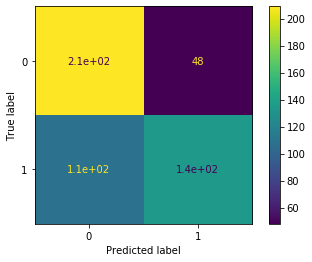

In [84]:
plot_confusion_matrix(clf_svm,
                      X_test_scaled,
                      y_test)

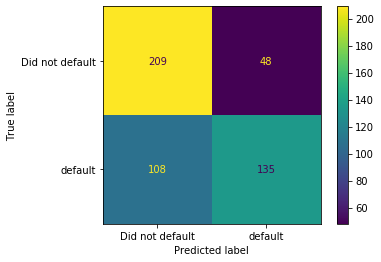

In [85]:
plot_confusion_matrix(clf_svm,
                      X_test_scaled,
                      y_test,
                      values_format='d',
                      display_labels=['Did not default','default'])

As we can see there are a large number of misclassifications, so now we'll optimize paramters using GridSearchCV

# Hyperparameter tuning

In [90]:
param_grid=[
    {'C':[0.5,1,10,100],#Note: Values of C must be greater than 0, C is the regularization parameter
     'gamma':['scale',1,0.1,0.01,0.001,0.0001],
     'kernel':['rbf']}
]

optimal_params= GridSearchCV(
                SVC(),
                param_grid,
                cv=5,
                scoring='accuracy',
                verbose=0)

In [91]:
optimal_params.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [93]:
optimal_params.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [98]:
clf_final=SVC(C=1,gamma=0.001,kernel='rbf')
clf_final.fit(X_train_scaled,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

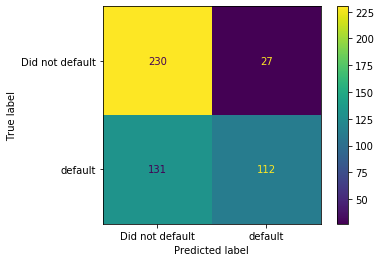

In [99]:
plot_confusion_matrix(clf_final,
                      X_test_scaled,
                      y_test,
                      values_format='d',
                      display_labels=['Did not default','default'])

As you can see the results from the optimized SVM are no better when compared with the preliminary model.
In other words SVM was pretty good straight out of the box without much optimization. This makes SVM a great, quick and dirty method for relatively small datasets.

**NOTE:** Although classification with this dataset and a SVM is not awesome, it may be still be better than other methods. We'd have to compare to find out.